# Chapter 5 - Matrices, Part 1

A `matrix` is a _vector_ taken to the next level.

Characteristics:
- highly versatile (sets of equations, geometric transformations, positions of particles over time, financial records, and etc)

In _data science_, they are called `data tables`. `Rows` correspond to _observations_ (e.g. customers), and `columns` to _features_ (e.g. purchases)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz

# Note; these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

In [15]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]]) #row vector
v + w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Creating and Visualizing Matrices in NumPy

## Visualizing, Indexing, and Slicing Matrices

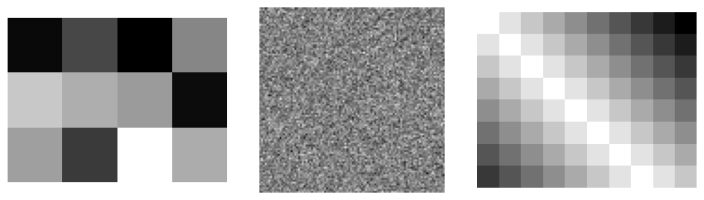

In [34]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): 
    axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

## Slicing out rows and columns

In [52]:
# create a matrix
A = np.arange(60).reshape(6,10)
print('Original matrix:\n')
print(A)

Original matrix:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


In [56]:
# get the [row_start:row_end:row_step, col_start:col_end:col_step]
sub = A[1:4:1,0:5:1]
print('Submatrix:\n')
print(sub)

Submatrix:

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [44]:
# get the n-th row
print(A[1,:])

[10 11 12 13 14 15 16 17 18 19]


In [46]:
# get the n-th column
print(A[:,1])

[ 1 11 21 31 41 51]


In [48]:
# multiple rows
A[0:2,:]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [50]:
# multiple columns
A[:,1:]

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [11, 12, 13, 14, 15, 16, 17, 18, 19],
       [21, 22, 23, 24, 25, 26, 27, 28, 29],
       [31, 32, 33, 34, 35, 36, 37, 38, 39],
       [41, 42, 43, 44, 45, 46, 47, 48, 49],
       [51, 52, 53, 54, 55, 56, 57, 58, 59]])

# Coding Exercises

# Exercise 1

In [81]:
# create a 3 x 4 matrix
matrix = np.arange(12).reshape(3,4)
# extract 2nd row, 4th column
sub_mat = matrix[1,3]

# print output
print(f'The matrix elemet at index (2,4) is {sub_mat}.')

The matrix elemet at index (2,4) is 7.
